In [21]:
import matplotlib


import imgutils
import imgutils_test as tst

In [19]:
tst.test_scanimgdir()

<bound method NDFrame.head of          filename
0  testimage1.tif
1  testimage2.tif>


<IPython.core.display.Javascript object>


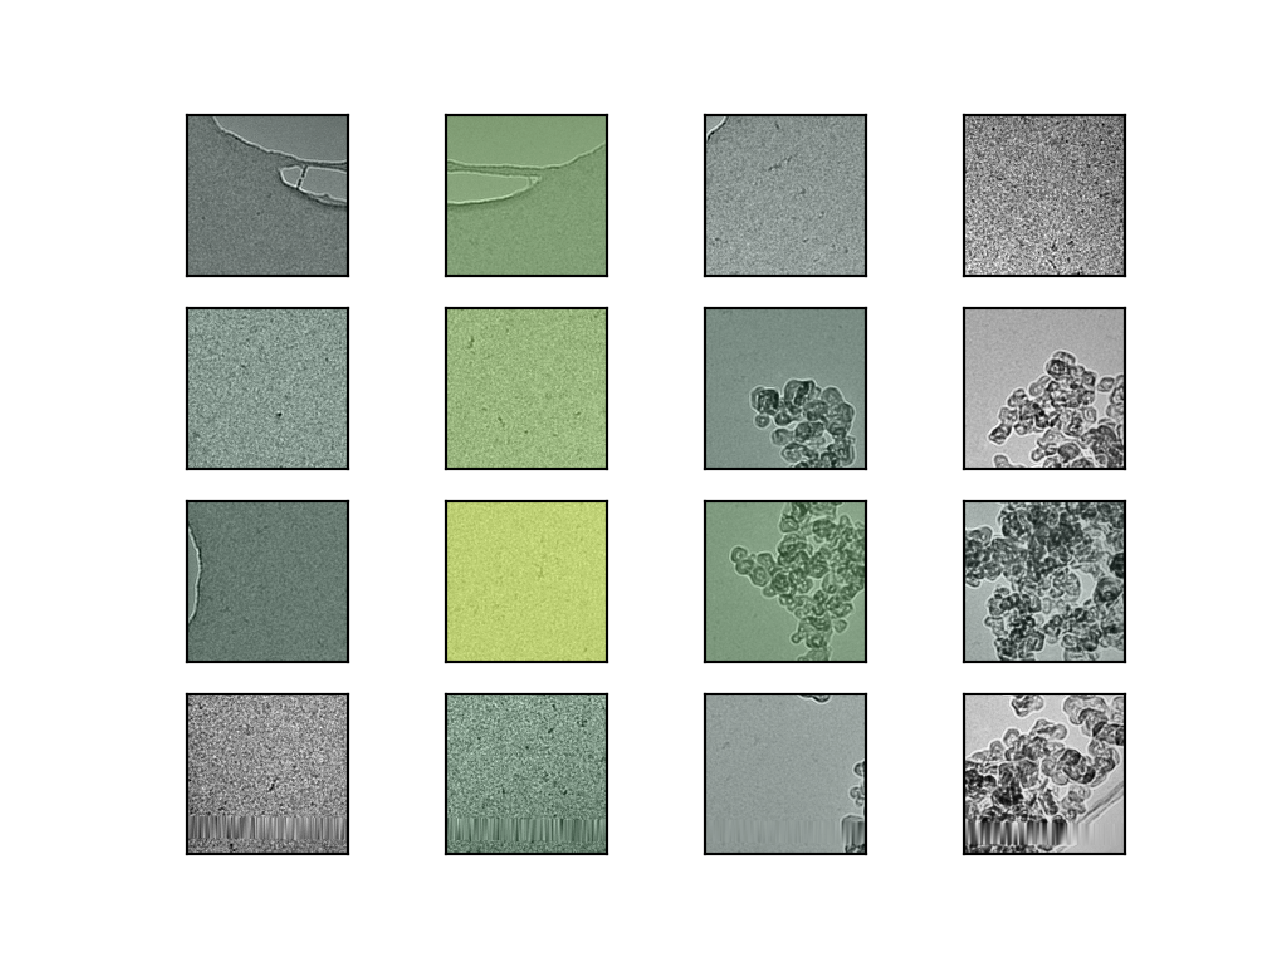

In [20]:
tst.test_heatmap()

In [22]:
df = tst.test_slicestats()

         filename  s_y  s_x  n_y  n_x     alias  img_min  img_median  img_max  \
0  testimage1.tif    0    0    2    2  img0_0-0     96.0       148.0    203.0   
1  testimage1.tif    0    1    2    2  img0_0-1     49.0       146.0    233.0   
2  testimage1.tif    1    0    2    2  img0_1-0    105.0       148.0    202.0   
3  testimage1.tif    1    1    2    2  img0_1-1     53.0       147.0    231.0   
4  testimage2.tif    0    0    2    2  img1_0-0     49.0       146.0    233.0   
5  testimage2.tif    0    1    2    2  img1_0-1     53.0       147.0    231.0   
6  testimage2.tif    1    0    2    2  img1_1-0     96.0       148.0    203.0   
7  testimage2.tif    1    1    2    2  img1_1-1    105.0       148.0    202.0   

     img_std  
0   5.368779  
1  15.152314  
2   4.092438  
3  25.083536  
4  15.152314  
5  25.083536  
6   5.368779  
7   4.092438  


<IPython.core.display.Javascript object>


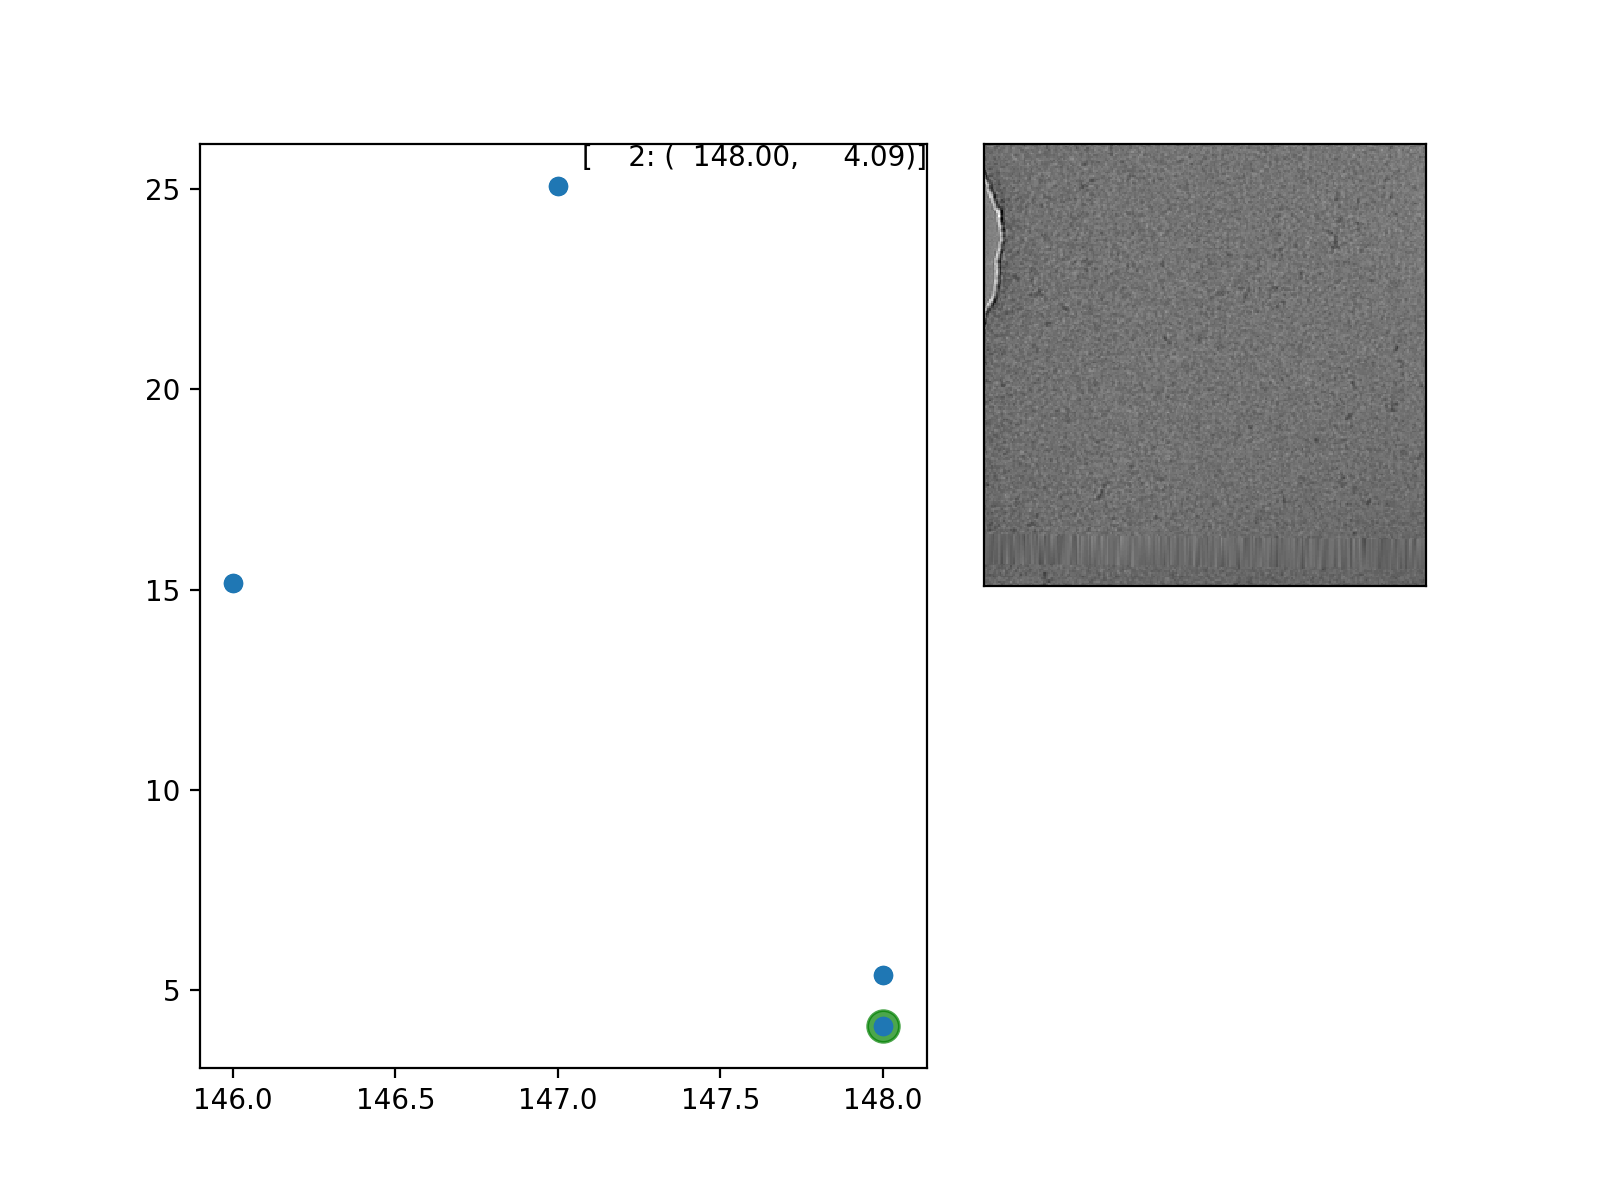

In [23]:
%matplotlib notebook
imgutils.plotwithimg(df, 'img_median', 'img_std', imgutils.getimgslice)

## Try Again With more images

In [24]:
statfuncs = [imgutils.img_min, imgutils.img_max, imgutils.img_median, imgutils.img_mean, imgutils.img_std]
df_files = imgutils.scanimgdir('../data/Crystals_Apr_12/Tileset7', '.tif')

In [25]:
df_files.head()

,filename
0,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...
1,..\data\Crystals_Apr_12\Tileset7\Tile_001-002-...
2,..\data\Crystals_Apr_12\Tileset7\Tile_001-003-...
3,..\data\Crystals_Apr_12\Tileset7\Tile_002-001-...
4,..\data\Crystals_Apr_12\Tileset7\Tile_002-002-...


In [26]:
df = imgutils.slicestats(list(df_files['filename'][:]), 8, 8, statfuncs)

In [27]:
print(len(df.index))
df.head()

384


,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_median,img_mean,img_std
0,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,0,8,8,img0_0-0,5419.0,12204.0,8942.0,8937.627492,462.440316
1,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,1,8,8,img0_0-1,5622.0,12927.0,9013.0,9014.907192,625.226840
2,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,2,8,8,img0_0-2,6000.0,12399.0,8954.0,8951.689724,547.851459
3,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,3,8,8,img0_0-3,5726.0,11485.0,8864.0,8847.720952,461.521998
4,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,4,8,8,img0_0-4,6084.0,10737.0,8717.0,8712.756356,347.614672


<IPython.core.display.Javascript object>


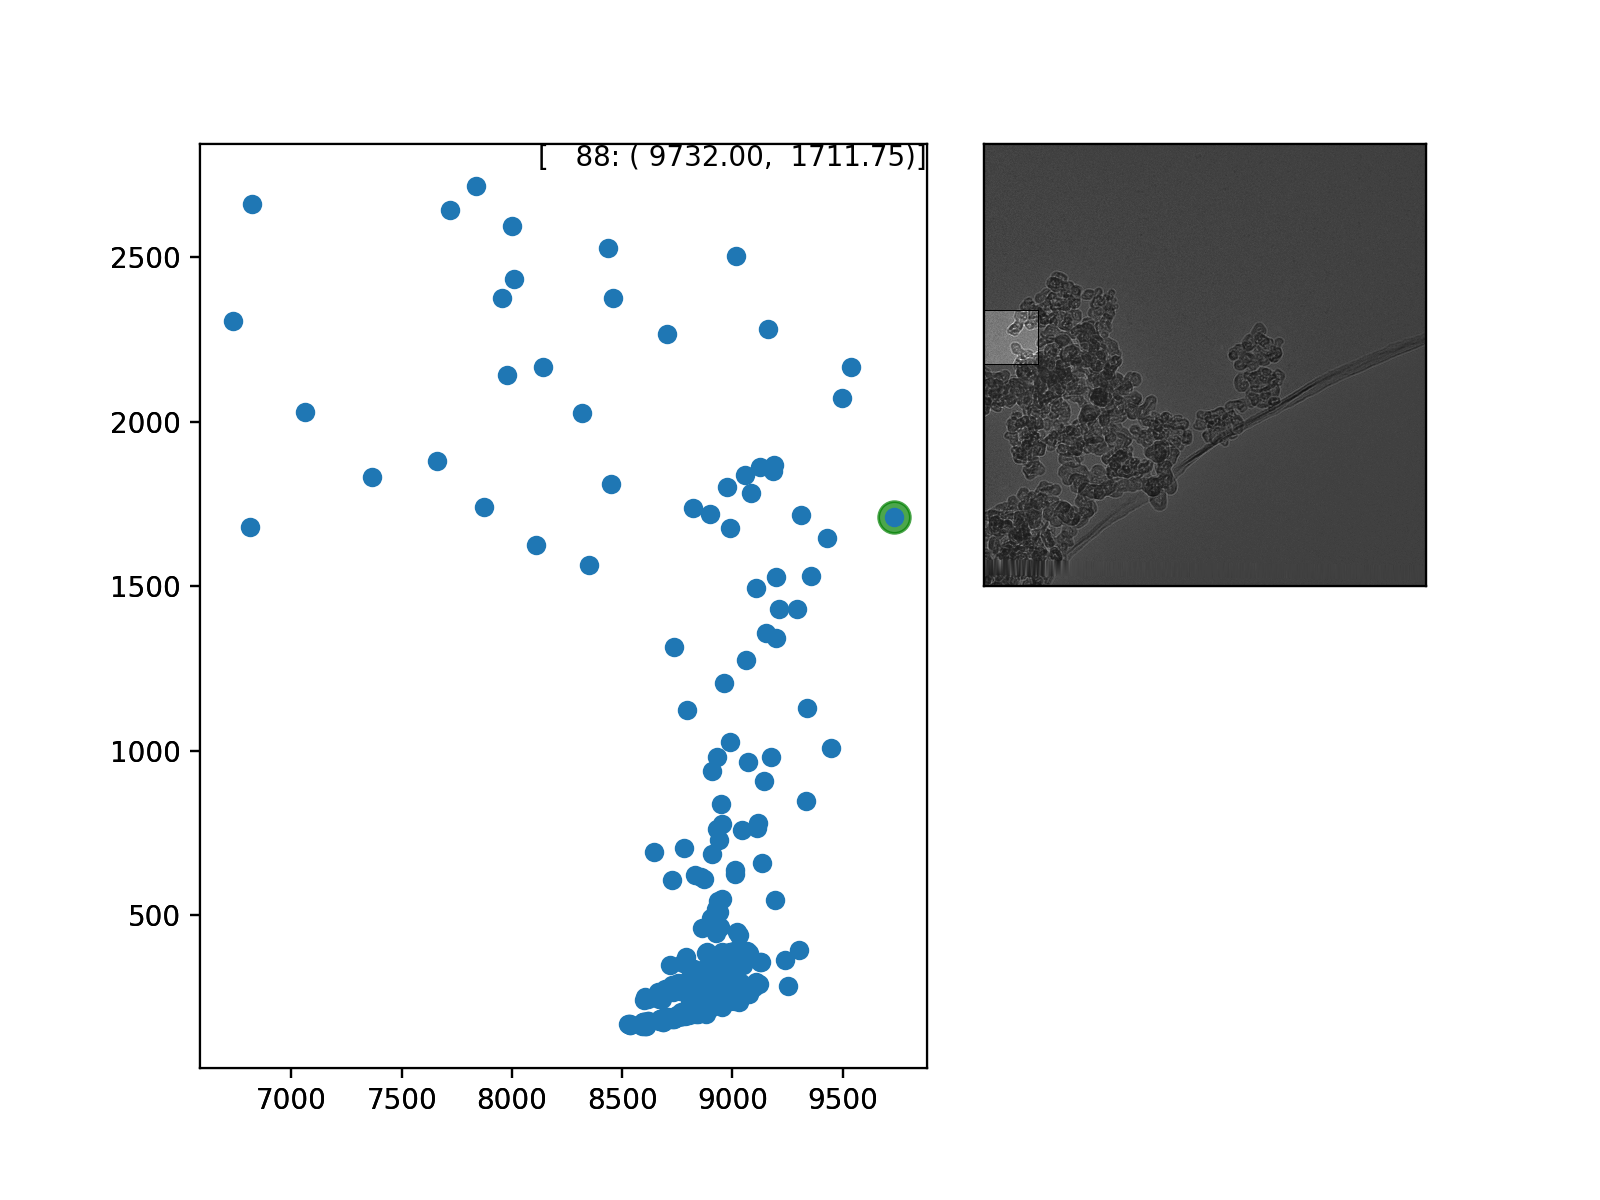

In [30]:
imgutils.plotwithimg(df, 'img_median', 'img_std', imgutils.getimgslice, True)


## Without context (i.e. image surrounding), still hard to judge image!
### So let's create an alternative image display


In [31]:
imgutils.plotwithimg(df, 'img_median', 'img_std', imgutils.highlightimgslice, True)

<IPython.core.display.Javascript object>


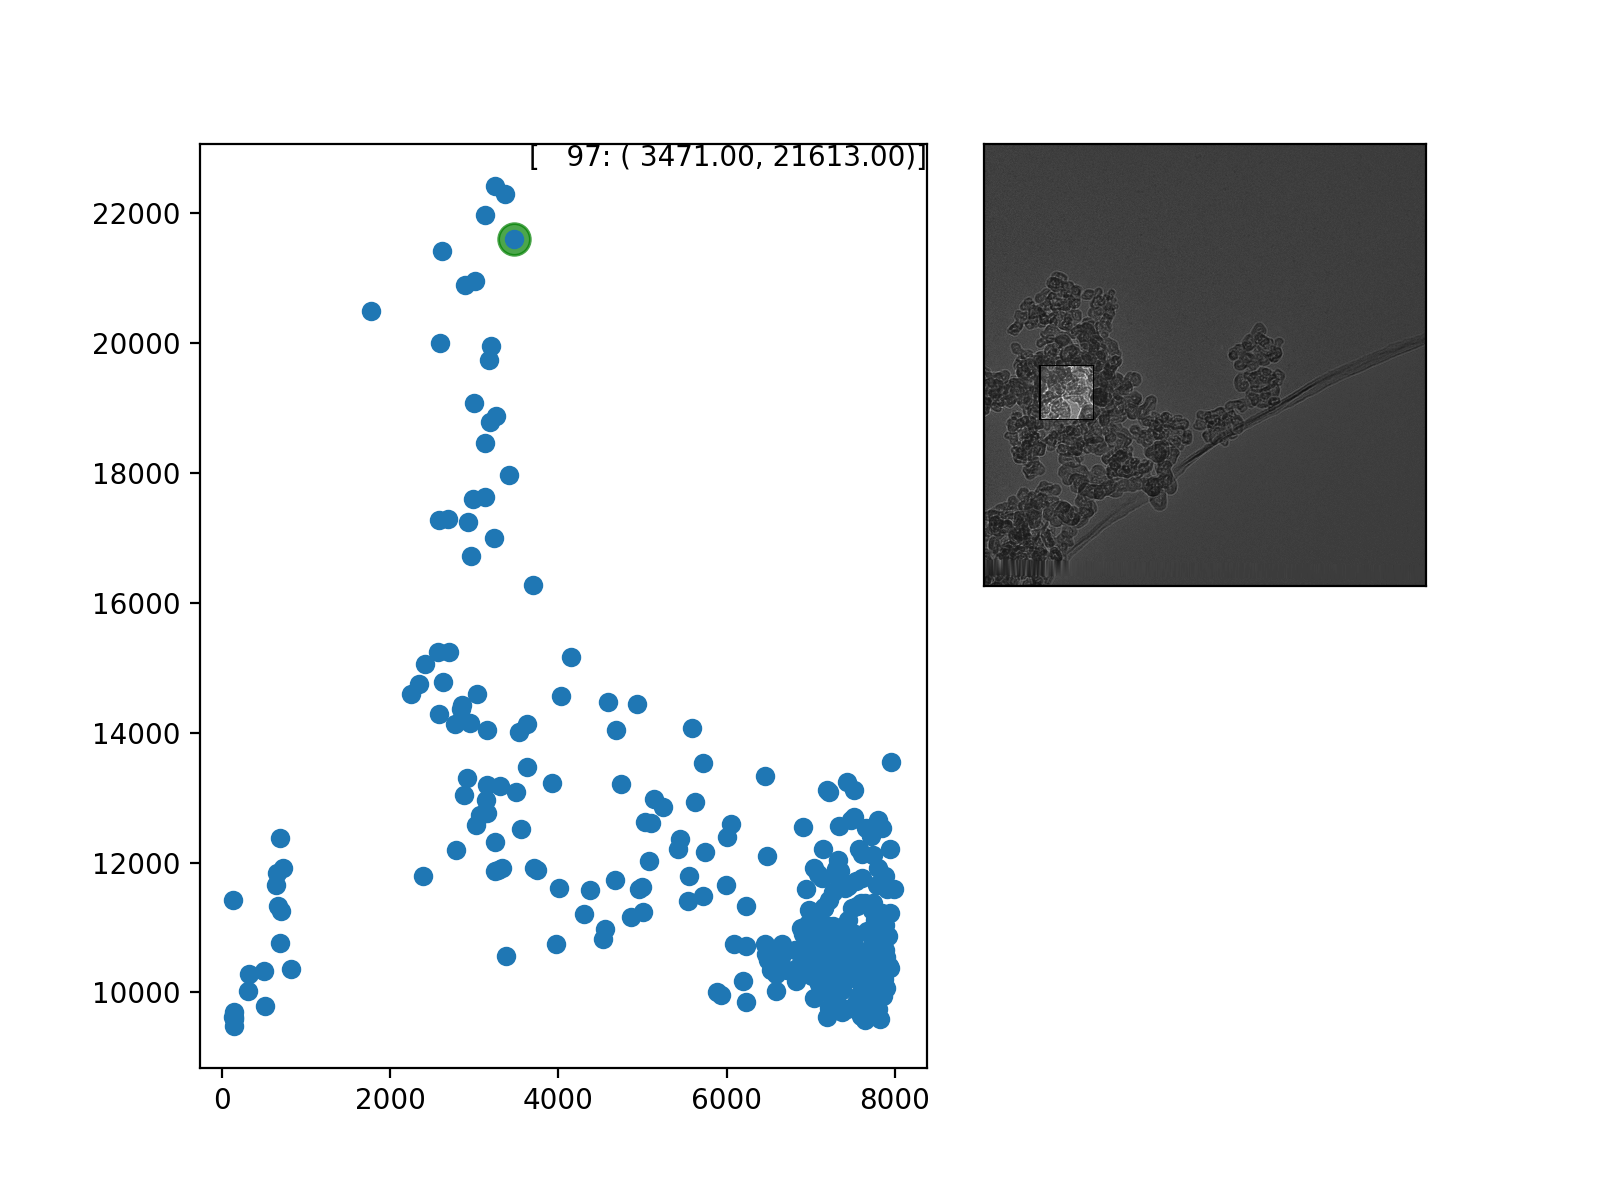

In [32]:
imgutils.plotwithimg(df, 'img_min', 'img_max', imgutils.highlightimgslice, True)

In [33]:
df['norm_min'] = df['img_min'] / df['img_median']
df['norm_max'] = df['img_max'] / df['img_median']
df['norm_median'] = df['img_median'] / df['img_median']
df['norm_mean'] = df['img_mean'] / df['img_median']
df['norm_std'] = df['img_std'] / df['img_median']
df['norm_range'] = df['norm_max'] - df['norm_min']



In [34]:
df.head()

,filename,s_y,s_x,n_y,n_x,alias,img_min,img_max,img_median,img_mean,img_std,norm_min,norm_max,norm_median,norm_mean,norm_std,norm_range
0,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,0,8,8,img0_0-0,5419.0,12204.0,8942.0,8937.627492,462.440316,0.606017,1.364795,1.0,0.999511,0.051716,0.758779
1,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,1,8,8,img0_0-1,5622.0,12927.0,9013.0,9014.907192,625.226840,0.623766,1.434262,1.0,1.000212,0.069369,0.810496
2,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,2,8,8,img0_0-2,6000.0,12399.0,8954.0,8951.689724,547.851459,0.670092,1.384744,1.0,0.999742,0.061185,0.714653
3,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,3,8,8,img0_0-3,5726.0,11485.0,8864.0,8847.720952,461.521998,0.645984,1.295690,1.0,0.998163,0.052067,0.649707
4,..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...,0,4,8,8,img0_0-4,6084.0,10737.0,8717.0,8712.756356,347.614672,0.697947,1.231731,1.0,0.999513,0.039878,0.533785


<IPython.core.display.Javascript object>


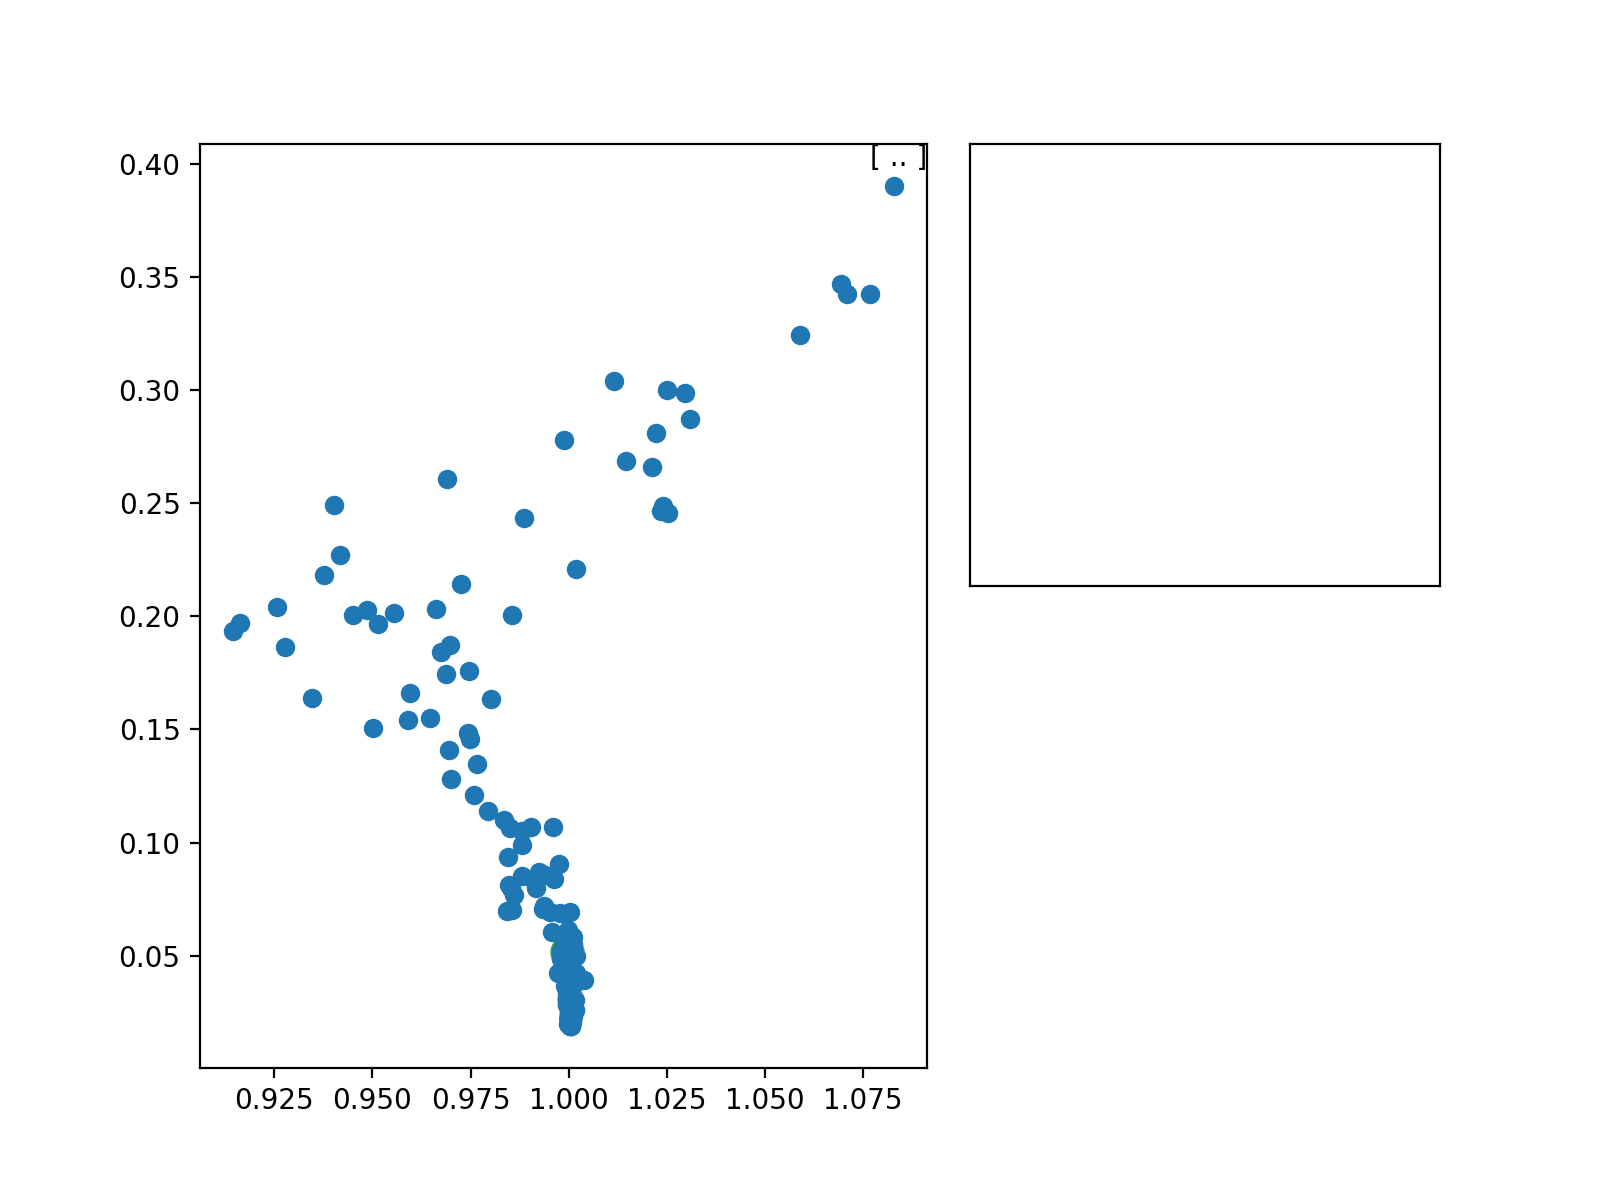

In [35]:
imgutils.plotwithimg(df, 'norm_mean', 'norm_std', imgutils.highlightimgslice, True)

In [36]:
import seaborn as sb

C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<IPython.core.display.Javascript object>


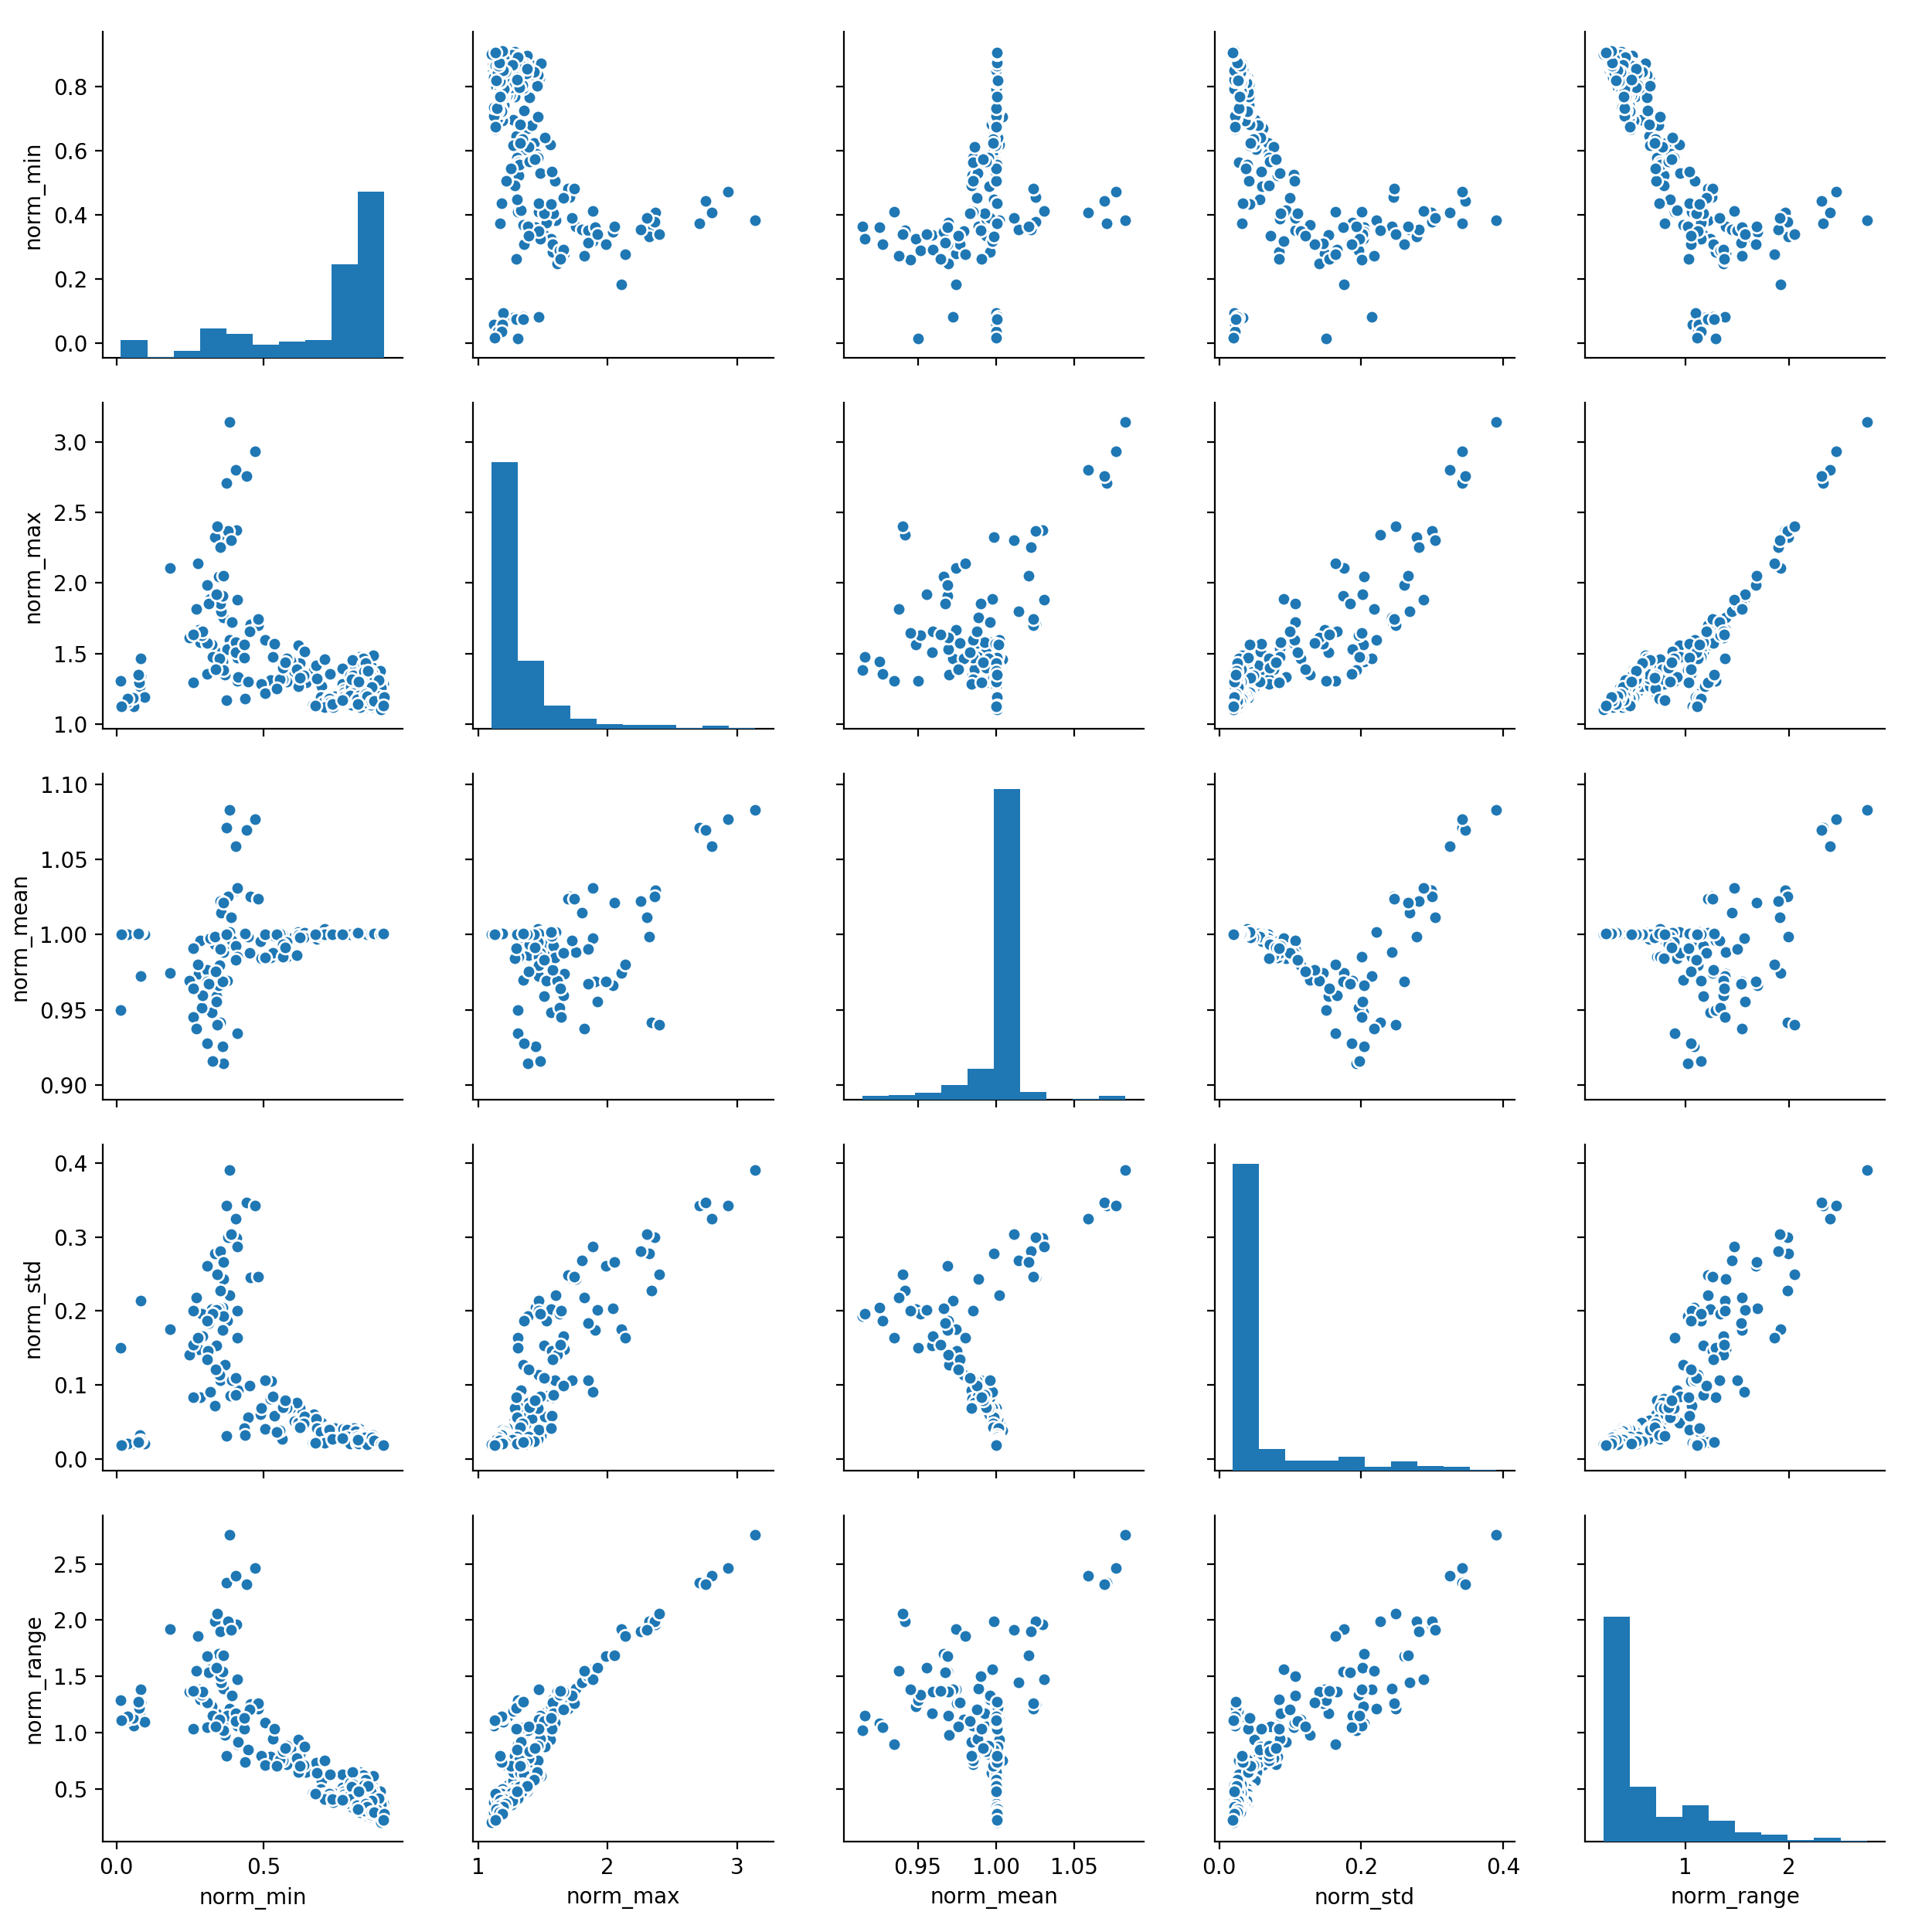

In [37]:
sb.pairplot(df, vars=['norm_min','norm_max', 'norm_mean', 'norm_std', 'norm_range'])

<IPython.core.display.Javascript object>


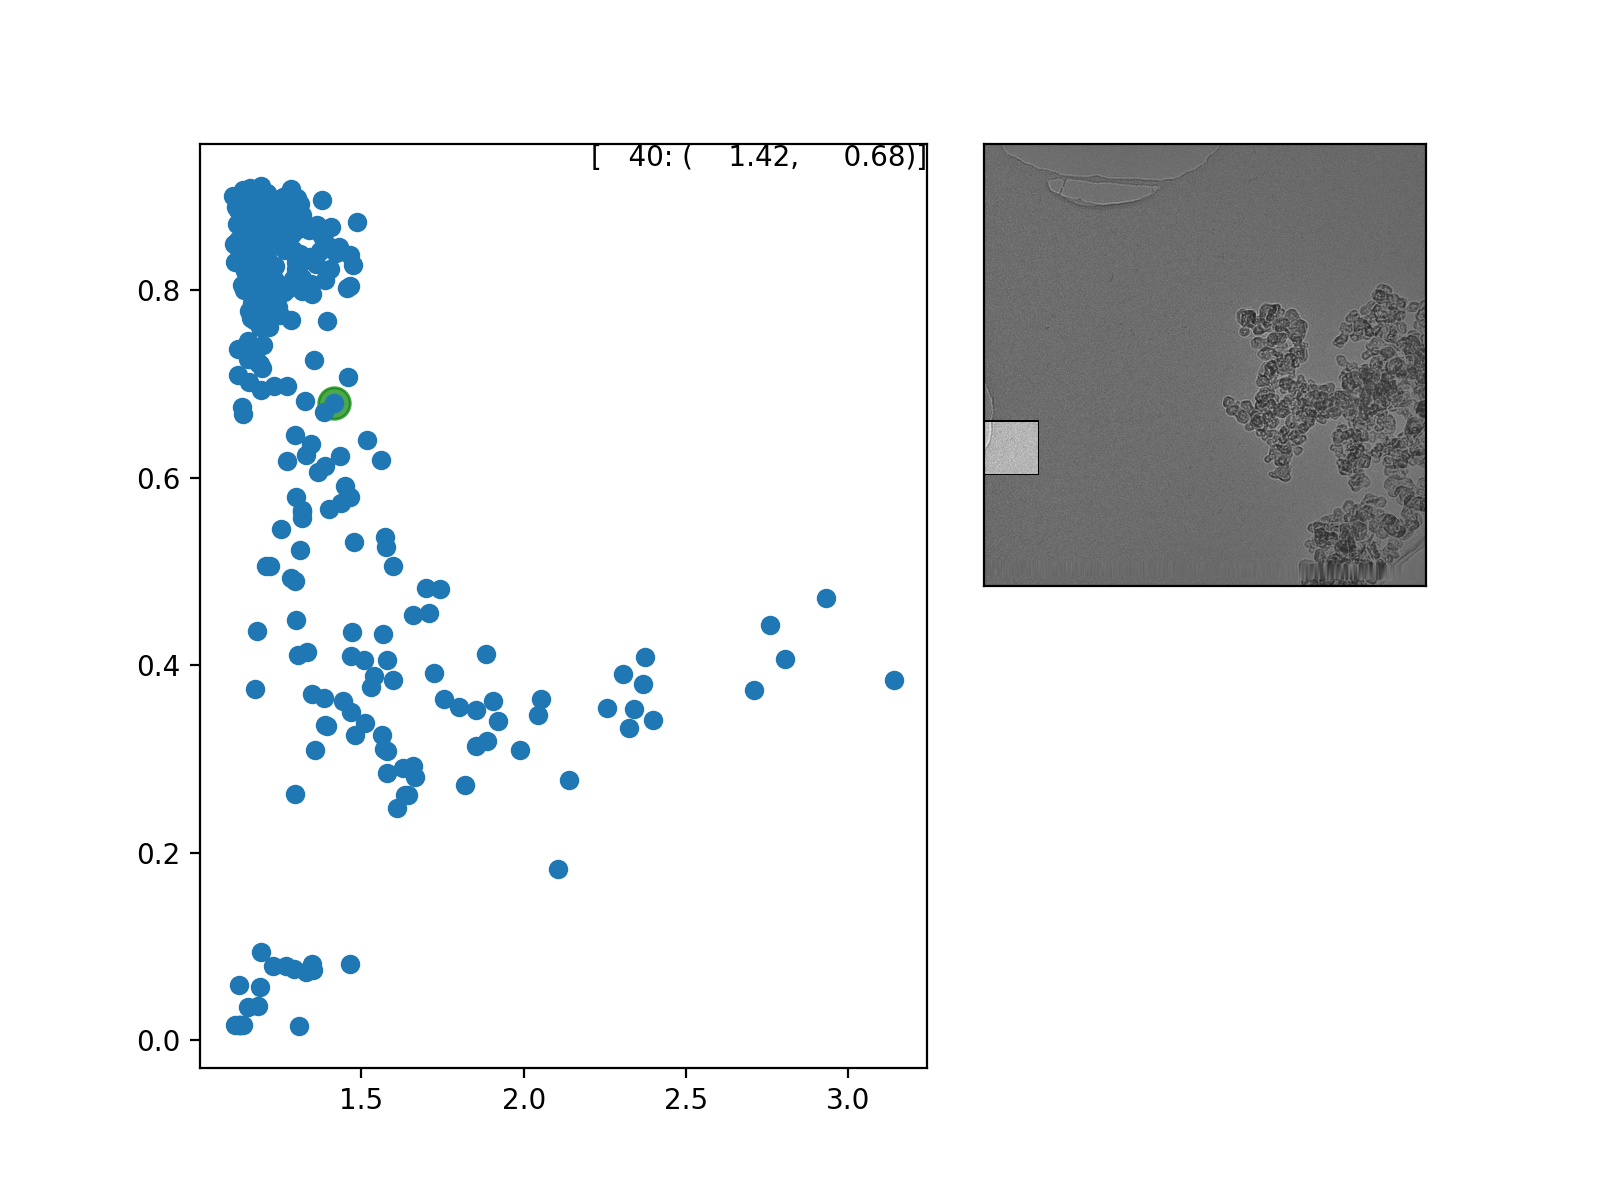

In [39]:
imgutils.plotwithimg(df, 'norm_max', 'norm_min', imgutils.highlightimgslice, True)